In [7]:
from google.colab import files
op=files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [0]:
import io
import pandas as pd
df_test=pd.read_excel("Test_set.xlsx")

In [5]:
from google.colab import files
up=files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [0]:
import io
import pandas as pd
df_train=pd.read_excel(io.BytesIO(up["Data_Train.xlsx"]))

In [0]:
big_df=df_train.append(df_test,sort="False")

In [119]:
big_df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [120]:
big_df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [0]:
big_df["Date"]=big_df["Date_of_Journey"].str.split("/").str[0]
big_df["Month"]=big_df["Date_of_Journey"].str.split("/").str[1]
big_df["Year"]=big_df["Date_of_Journey"].str.split("/").str[2]

In [0]:
big_df=big_df.drop("Date_of_Journey",axis="columns")

In [0]:
big_df["Date"]=big_df["Date"].astype(int)
big_df["Month"]=big_df["Month"].astype(int)
big_df["Year"]=big_df["Year"].astype(int)

In [124]:
big_df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
Date                 int64
Month                int64
Year                 int64
dtype: object

In [0]:
big_df["Arrival_Time"]=big_df["Arrival_Time"].str.split(" ").str[0]

In [126]:
big_df.head()

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,2019


In [127]:
big_df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
Date                  0
Month                 0
Year                  0
dtype: int64

In [128]:
big_df[big_df["Total_Stops"].isnull()]

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
9039,No info,Air India,09:25,09:45,Cochin,23h 40m,7480.0,NaN,Delhi,NaN,6,5,2019


In [0]:
big_df["Total_Stops"]=big_df["Total_Stops"].fillna("1 stops")

In [130]:
big_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '1 stops', '4 stops'],
      dtype=object)

In [0]:
big_df["Total_Stops"]=big_df["Total_Stops"].replace("non-stop","0 stop")

In [132]:
big_df["Total_Stops"].unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '1 stops', '4 stops'],
      dtype=object)

In [0]:
big_df["Stop"]=big_df["Total_Stops"].str.split(" ").str[0]

In [0]:
big_df=big_df.drop("Total_Stops",axis="columns")

In [0]:
big_df["Hour"]=big_df["Dep_Time"].str.split(":").str[0]

In [0]:
big_df["Arrival_Hour"]=big_df["Arrival_Time"].str.split(":").str[0]
big_df["Arrival_Minute"]=big_df["Arrival_Time"].str.split(":").str[1]

In [0]:
big_df["Arrival_Hour"]=big_df["Arrival_Hour"].astype(int)
big_df["Arrival_Minute"]=big_df["Arrival_Minute"].astype(int)


In [0]:
big_df=big_df.drop("Arrival_Time",axis="columns")

In [139]:
big_df

,Additional_Info,Airline,Dep_Time,Destination,Duration,Price,Route,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute
0,No info,IndiGo,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,22,1,10
1,No info,Air India,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,05,13,15
2,No info,Jet Airways,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,09,4,25
3,No info,IndiGo,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,18,23,30
4,No info,IndiGo,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,16,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,6,6,2019,1,20,20,25
2667,No info,IndiGo,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,27,3,2019,0,14,16,55
2668,No info,Jet Airways,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,21,4,25
2669,No info,Air India,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,04,19,15


In [0]:
big_df["Dep_Hour"]=big_df["Dep_Time"].str.split(":").str[0]
big_df["Dep_Min"]=big_df["Dep_Time"].str.split(":").str[0]

In [0]:
big_df["Dep_Hour"]=big_df["Dep_Hour"].astype(int)
big_df["Dep_Min"]=big_df["Dep_Min"].astype(int)
big_df=big_df.drop("Dep_Time",axis="columns")

In [142]:
big_df

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min
0,No info,IndiGo,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,22,1,10,22,22
1,No info,Air India,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,05,13,15,5,5
2,No info,Jet Airways,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,09,4,25,9,9
3,No info,IndiGo,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,18,23,30,18,18
4,No info,IndiGo,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,16,21,35,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,6,6,2019,1,20,20,25,20,20
2667,No info,IndiGo,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,27,3,2019,0,14,16,55,14,14
2668,No info,Jet Airways,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,21,4,25,21,21
2669,No info,Air India,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,04,19,15,4,4


In [0]:
big_df["Route_1"]=big_df["Route"].str.split("→ ").str[0]

In [144]:
big_df

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route_1
0,No info,IndiGo,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,22,1,10,22,22,BLR
1,No info,Air India,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,05,13,15,5,5,CCU
2,No info,Jet Airways,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,09,4,25,9,9,DEL
3,No info,IndiGo,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,18,23,30,18,18,CCU
4,No info,IndiGo,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,16,21,35,16,16,BLR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,6,6,2019,1,20,20,25,20,20,CCU
2667,No info,IndiGo,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,27,3,2019,0,14,16,55,14,14,CCU
2668,No info,Jet Airways,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,21,4,25,21,21,DEL
2669,No info,Air India,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,04,19,15,4,4,DEL


In [0]:
big_df["Route_2"]=big_df["Route"].str.split("→ ").str[1]
big_df["Route_3"]=big_df["Route"].str.split("→ ").str[2]
big_df["Route_4"]=big_df["Route"].str.split("→ ").str[3]
big_df["Route_5"]=big_df["Route"].str.split("→ ").str[4]

In [146]:
big_df

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,No info,IndiGo,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,24,3,2019,0,22,1,10,22,22,BLR,DEL,NaN,NaN,NaN
1,No info,Air India,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,2019,2,05,13,15,5,5,CCU,IXR,BBI,BLR,NaN
2,No info,Jet Airways,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,2019,2,09,4,25,9,9,DEL,LKO,BOM,COK,NaN
3,No info,IndiGo,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,12,5,2019,1,18,23,30,18,18,CCU,NAG,BLR,NaN,NaN
4,No info,IndiGo,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1,3,2019,1,16,21,35,16,16,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,6,6,2019,1,20,20,25,20,20,CCU,DEL,BLR,NaN,NaN
2667,No info,IndiGo,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,27,3,2019,0,14,16,55,14,14,CCU,BLR,NaN,NaN,NaN
2668,No info,Jet Airways,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,21,4,25,21,21,DEL,BOM,COK,NaN,NaN
2669,No info,Air India,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,6,3,2019,1,04,19,15,4,4,DEL,BOM,COK,NaN,NaN


In [0]:
big_df["Price"].fillna((big_df["Price"].mean()),inplace=True)

In [0]:
big_df["Route_1"].fillna("None",inplace=True)
big_df["Route_2"].fillna("None",inplace=True)
big_df["Route_3"].fillna("None",inplace=True)
big_df["Route_4"].fillna("None",inplace=True)
big_df["Route_5"].fillna("None",inplace=True)

In [0]:
big_df=big_df.drop("Route",axis="columns")

In [0]:
big_df=big_df.drop(['Duration'],axis=1)

In [151]:
big_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,No info,IndiGo,New Delhi,3897.0,Banglore,24,3,2019,0,22,1,10,22,22,BLR,DEL,None,None,None
1,No info,Air India,Banglore,7662.0,Kolkata,1,5,2019,2,05,13,15,5,5,CCU,IXR,BBI,BLR,None
2,No info,Jet Airways,Cochin,13882.0,Delhi,9,6,2019,2,09,4,25,9,9,DEL,LKO,BOM,COK,None
3,No info,IndiGo,Banglore,6218.0,Kolkata,12,5,2019,1,18,23,30,18,18,CCU,NAG,BLR,None,None
4,No info,IndiGo,New Delhi,13302.0,Banglore,1,3,2019,1,16,21,35,16,16,BLR,NAG,DEL,None,None


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
big_df["Airline"]=le.fit_transform(big_df["Airline"])
big_df["Destination"]=le.fit_transform(big_df["Destination"])
big_df["Additional_Info"]=le.fit_transform(big_df["Additional_Info"])
big_df["Source"]=le.fit_transform(big_df["Source"])
big_df["Route_1"]=le.fit_transform(big_df["Route_1"])
big_df["Route_2"]=le.fit_transform(big_df["Route_2"])
big_df["Route_3"]=le.fit_transform(big_df["Route_3"])
big_df["Route_4"]=le.fit_transform(big_df["Route_4"])
big_df["Route_5"]=le.fit_transform(big_df["Route_5"])


In [171]:
big_df.shape

(13354, 19)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [0]:
train_data=big_df.iloc[0:10683,]
test_data=big_df.iloc[10683:]

In [0]:
X=train_data.drop(["Price"],axis=1)

In [0]:
y=train_data["Price"]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
model=SelectFromModel(Lasso(alpha=0.05,random_state=0))

In [168]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [170]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [0]:
selected_feature=X_train.columns[(model.get_support())]

In [175]:
selected_feature

Index(['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Stop', 'Hour', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [176]:
big_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3,5,3897.0,0,24,3,2019,0,22,1,10,22,22,0,13,24,12,4
1,8,1,0,7662.0,3,1,5,2019,2,05,13,15,5,5,2,25,1,3,4
2,8,4,1,13882.0,2,9,6,2019,2,09,4,25,9,9,3,32,4,5,4
3,8,3,0,6218.0,3,12,5,2019,1,18,23,30,18,18,2,34,3,12,4
4,8,3,5,13302.0,0,1,3,2019,1,16,21,35,16,16,0,34,8,12,4


In [0]:
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# no of trees in RandomForest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no of features to consider at every split
max_features=["auto","sqrt"]
#maximum no of level in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#minimum no of samples require to split a node
min_samples_split=[2,5,10,15,100]
#min no of samples required at each node
min_samples_leaf=[1,2,5,10]



In [185]:
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf}


print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [0]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,scoring='neg_mean_squared_error',cv=2,verbose=2,n_jobs=1,random_state=42)

In [189]:
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.4s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.7s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.7s
[CV] n_estimators=600, min_samples_split=1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
y_pred=rf_random.predict(X_test)


In [191]:
rf_random.score(X_test,y_test)

-2817534.0154435453

In [193]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

737.5719211367592

In [195]:
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_test,y_pred)

737.5719211367592

In [197]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8609068252416019

In [199]:
y_test.head()

9693     6171.0
9825     3873.0
7702    10991.0
1437    16757.0
6828     6316.0
Name: Price, dtype: float64

In [202]:
y_pred

array([ 6260.16455185,  3921.09731944, 12009.59478443, ...,
       11608.67938033, 14298.24227056,  7675.07107143])

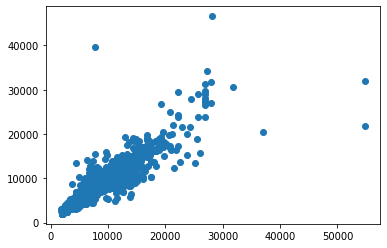

In [205]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

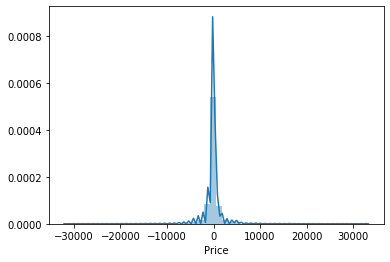

In [206]:
import seaborn as sns

sns.distplot(y_test-y_pred)